In [ ]:
### Data type of data files

import pandas as pd

print('===news_data.csv===')
df = pd.read_csv('../data/news_data.csv')
df.info()

print('===prices_data.csv===')
df = pd.read_csv('../data/prices_data.csv')
df.info()

print('===news_data_processed.csv===')
df = pd.read_csv('../data/news_data_processed.csv')
df.info()

print('===sentiment_scores.csv===')
df = pd.read_csv('../data/sentiment_scores.csv')
df.info()

print('===scores_with_prices===')
df = pd.read_csv('../data/scores_with_prices.csv')
df.info()

===news_data.csv===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      405 non-null    object
 1   headline  405 non-null    object
 2   summary   340 non-null    object
dtypes: object(3)
memory usage: 9.6+ KB
===prices_data.csv===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18 non-null     object 
 1   price   18 non-null     float64
dtypes: float64(1), object(1)
memory usage: 420.0+ bytes
===news_data_processed.csv===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    20 non-null     object
 1   text    20 non-null     object
dtypes: object(2)
memory usage: 452.0+ by

In [2]:
### Summary statistics for the stock price data

import pandas as pd

df = pd.read_csv('../data/prices_data.csv')

summary_stats = df['price'].describe()
print(summary_stats)

count     18.000000
mean     136.327778
std        9.682519
min      121.810000
25%      127.372500
50%      137.070000
75%      144.140000
max      153.030000
Name: price, dtype: float64


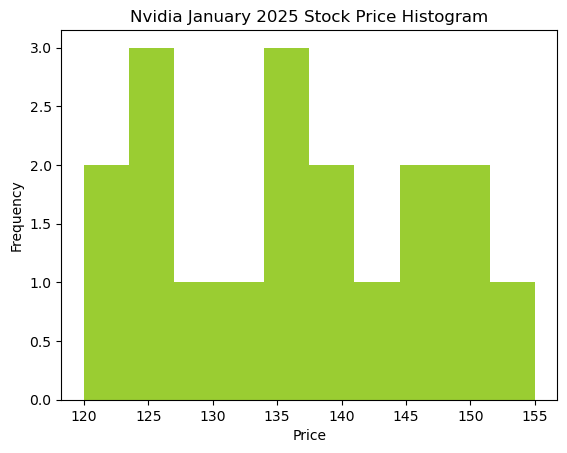

In [16]:
### Histogram for the stock price data

import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/prices_data.csv')
data = df['price']

# create the histogram
plt.hist(data, bins=10, range=(120, 155), color="yellowgreen")

# add labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Nvidia January 2025 Stock Price Histogram")

# show the histogram
plt.show()

In [4]:
### Frequency table for news article data
import pandas as pd

# read the CSV file
df = pd.read_csv('../data/news_data.csv')

# convert 'date' column to datetime and extract just the date part
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.date

# define functions to check if a field is non-empty
def non_empty(x):
    return 1 if pd.notna(x) and str(x).strip() != "" else 0

# create indicator columns for headlines and summaries
df['headline_count'] = df['headline'].apply(non_empty)
df['summary_count'] = df['summary'].apply(non_empty)

# group by day and sum the counts
frequency_table = df.groupby('day')[['headline_count', 'summary_count']].sum().reset_index()

print(frequency_table)

# calculate total counts across all days
total_headlines = df['headline_count'].sum()
total_summaries = df['summary_count'].sum()

print("\nTotal Counts:")
print("Total Headlines:", total_headlines)
print("Total Summaries:", total_summaries)

           day  headline_count  summary_count
0   2025-01-06              20             11
1   2025-01-07              45             25
2   2025-01-08              28             21
3   2025-01-09              12             10
4   2025-01-10              19             14
5   2025-01-11               2              2
6   2025-01-12               3              3
7   2025-01-13              18             11
8   2025-01-14              11              7
9   2025-01-15              14             10
10  2025-01-16              18             10
11  2025-01-17              19             11
12  2025-01-18               1              1
13  2025-01-19               4              3
14  2025-01-20               3              1
15  2025-01-21              10              7
16  2025-01-22              17             12
17  2025-01-23              10              8
18  2025-01-24               8              4
19  2025-01-25               1              1
20  2025-01-27              36    

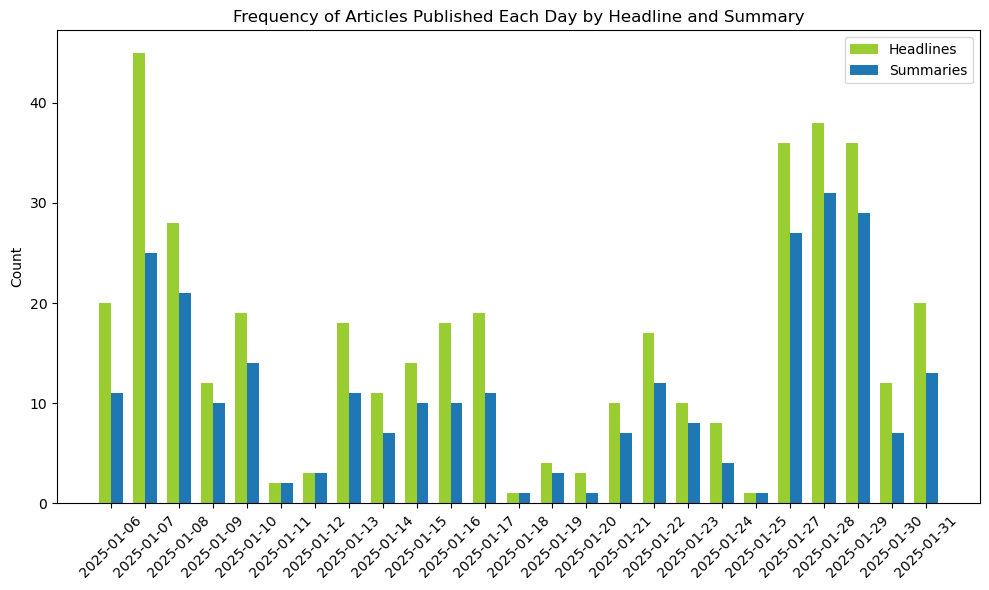

In [8]:
### Bar chart illustrating the frequency distribution

# create the double bar chart
days = frequency_table['day'].astype(str)  # convert dates to strings for better labeling
headline_counts = frequency_table['headline_count']
summary_counts = frequency_table['summary_count']

x = np.arange(len(days))  # the label locations
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, headline_counts, width, label='Headlines', color="yellowgreen")
rects2 = ax.bar(x + width/2, summary_counts, width, label='Summaries')

# add labels, title, and x-axis tick labels
ax.set_ylabel('Count')
ax.set_title('Frequency of Articles Published Each Day by Headline and Summary')
ax.set_xticks(x)
ax.set_xticklabels(days, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()